In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
# Load the weather data for Chicago.  We only care about three columns: date_time,
# min temp, and max temp.  Make date_time the index, and set the names of the min
# and max temp columns to "mintemp" and "maxtemp"

filename = '../data/chicago,il.csv'

df = pd.read_csv(filename, 
                 usecols=[0, 1,2],
                 header=0,
                 names=['date_time','maxtemp', 'mintemp'],
                parse_dates=['date_time'],
                index_col=['date_time'])
df.head()

,maxtemp,mintemp
date_time,,
2018-12-11 00:00:00,1,-2
2018-12-11 03:00:00,1,-2
2018-12-11 06:00:00,1,-2
2018-12-11 09:00:00,1,-2
2018-12-11 12:00:00,1,-2


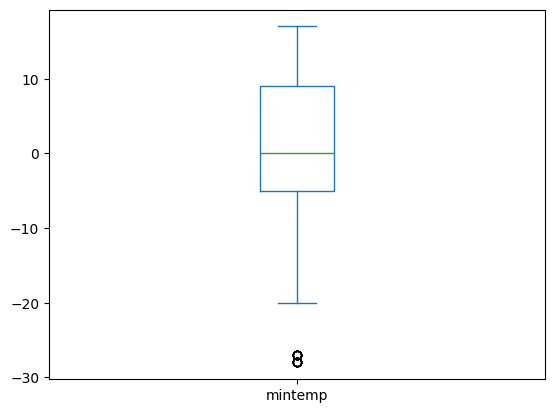

In [24]:
# Create a boxplot of Chicago's minimum temperatures during this period.
p = df['mintemp'].plot.box()
f = p.get_figure()
f.savefig('../../media/CH10_F7_LERNER.jpg')

In [4]:
# Find the values that are represented as dots on that boxplot

# note: this assumes outliers are 2.5 * std below and above the mean.
# I need to investigate this more; they might be 1.5 IQR above and below 75%/25%

df.loc[df['mintemp'] < df['mintemp'].mean() - (df['mintemp'].std() * 2.5), 'mintemp']

date_time
2019-01-30 00:00:00   -28
2019-01-30 03:00:00   -28
2019-01-30 06:00:00   -28
2019-01-30 09:00:00   -28
2019-01-30 12:00:00   -28
2019-01-30 15:00:00   -28
2019-01-30 18:00:00   -28
2019-01-30 21:00:00   -28
2019-01-31 00:00:00   -27
2019-01-31 03:00:00   -27
2019-01-31 06:00:00   -27
2019-01-31 09:00:00   -27
2019-01-31 12:00:00   -27
2019-01-31 15:00:00   -27
2019-01-31 18:00:00   -27
2019-01-31 21:00:00   -27
Name: mintemp, dtype: int64

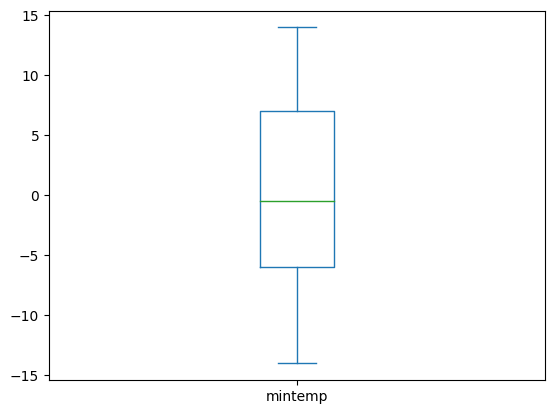

In [27]:
# Create a boxplot of Chicago's minimum temperatures in February.
p = df.loc['01-Feb-2019':'28-Feb-2019', 'mintemp'].plot.box()
f = p.get_figure()
f.savefig('../../media/CH10_F8_LERNER.jpg')

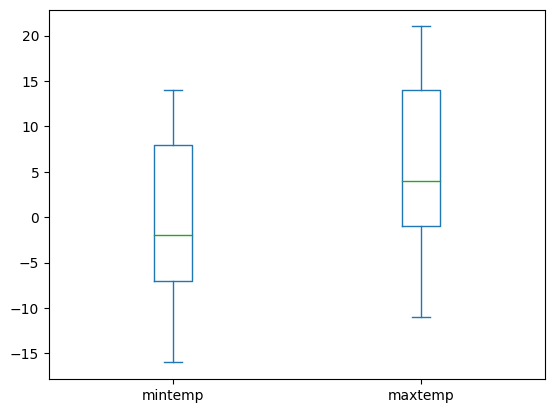

In [28]:
# Create a side-by-side boxplot of Chicago's minimum and temperatures in February and March
p = df.loc['01-Feb-2019':'30-Mar-2019', ['mintemp','maxtemp']].plot.box()
f = p.get_figure()
f.savefig('../../media/CH10_F9_LERNER.jpg')

In [7]:
# Now read data from Los Angeles and Boston in, as well.  Create a single data
# frame with data from all three cities, along with a "city" 

df['city'] = 'Chicago'

for city_stem in ['los+angeles,ca', 'boston,ma']:
    new_df = pd.read_csv(f'../data/{city_stem}.csv', 
                 usecols=[0, 1,2],
                 header=0,
                 names=['date_time','maxtemp', 'mintemp'],
                parse_dates=['date_time'],
                index_col=['date_time'])
    new_df['city'] = city_stem.split(',')[0].replace('+', ' ').title()
    df = pd.concat([df, new_df])

df.head()

,maxtemp,mintemp,city
date_time,,,
2018-12-11 00:00:00,1,-2,Chicago
2018-12-11 03:00:00,1,-2,Chicago
2018-12-11 06:00:00,1,-2,Chicago
2018-12-11 09:00:00,1,-2,Chicago
2018-12-11 12:00:00,1,-2,Chicago


In [8]:
# Get descriptive statistics for mintemp and maxtemp, grouped by city
df.groupby('city')[['mintemp', 'maxtemp']].describe()

mintemp                                                   maxtemp   
              count       mean       std   min  25%   50%   75%   max   count   
city                                                                            
Boston        728.0  -3.142857  4.957195 -14.0 -6.0  -3.0   0.0   9.0   728.0  \
Chicago       728.0  -5.076923  6.255857 -28.0 -9.0  -4.0  -1.0   6.0   728.0   
Los Angeles   728.0  10.637363  2.705200   4.0  9.0  11.0  12.0  17.0   728.0   

                                                                
                  mean       std   min   25%   50%   75%   max  
city                                                            
Boston        2.868132  4.945277 -12.0   0.0   2.0   6.0  17.0  
Chicago      -0.736264  6.128985 -25.0  -3.0   0.0   3.0   9.0  
Los Angeles  17.054945  2.708640  12.0  15.0  16.0  19.0  23.0

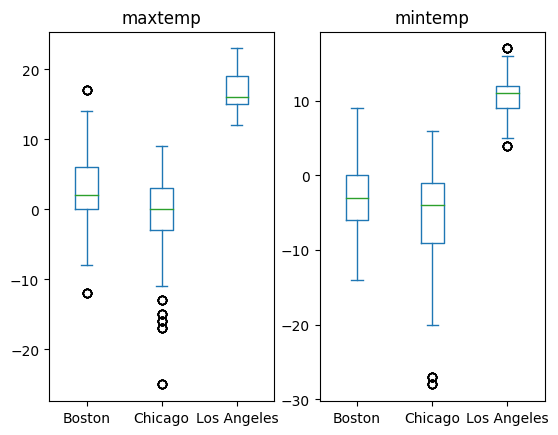

In [31]:
# Create a boxplot showing the minimum and maximum temperatures for each of the three cities in df
p, ax = df.plot.box(column=['mintemp', 'maxtemp'], by='city')

In [35]:
f = ax.get_figure()
f.savefig('../../media/CH10_F10_LERNER.jpg')

In [10]:
s = Series([10, 15, 17, 20, 25])
s.describe()

count     5.00000
mean     17.40000
std       5.59464
min      10.00000
25%      15.00000
50%      17.00000
75%      20.00000
max      25.00000
dtype: float64

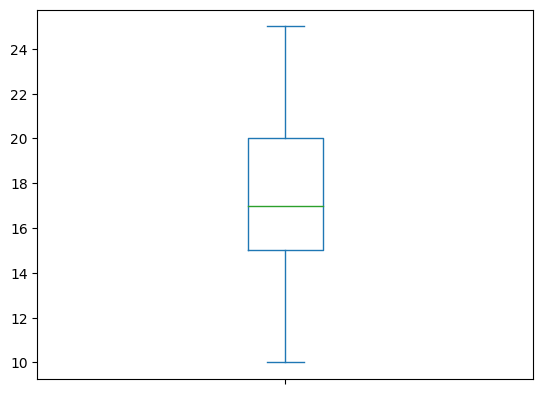

In [11]:
p = s.plot.box()
f = p.get_figure()
f.savefig('../../media/CH10_F5_LERNER.jpg')

In [21]:
s = Series([-20, 10, 15, 17, 20, 25, 40])


In [22]:
s.describe()

count     7.000000
mean     15.285714
std      18.273061
min     -20.000000
25%      12.500000
50%      17.000000
75%      22.500000
max      40.000000
dtype: float64

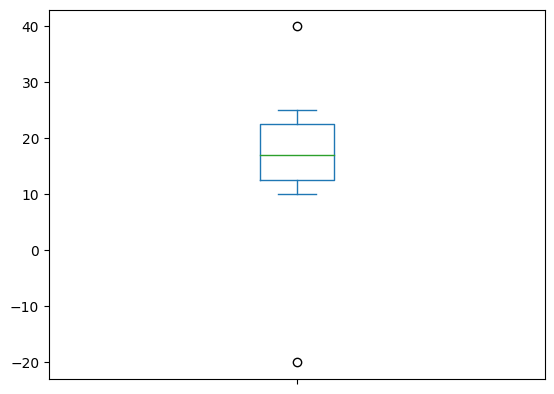

In [23]:
p = s.plot.box()
f = p.get_figure()
f.savefig('../../media/CH10_F6_LERNER.jpg')